In [5]:
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
%matplotlib inline

path = 'yaleBfaces/subset0/'
T = np.zeros((2500, 0))
train_labels = list()
for i, file in enumerate(os.listdir(path)):
    img = imageio.imread(os.path.join(path, file))
    img = img.reshape(-1, 1)
    T = np.hstack((T, img))
    train_labels.append(''.join(char for char in file.split('_')[0] if char.isdigit()))
    
train_labels = np.array([int(label) for label in train_labels])
# indices = np.arange(T.shape[1])
# np.random.shuffle(indices)
# T = T.T[indices].T
# train_labels = train_labels[indices]


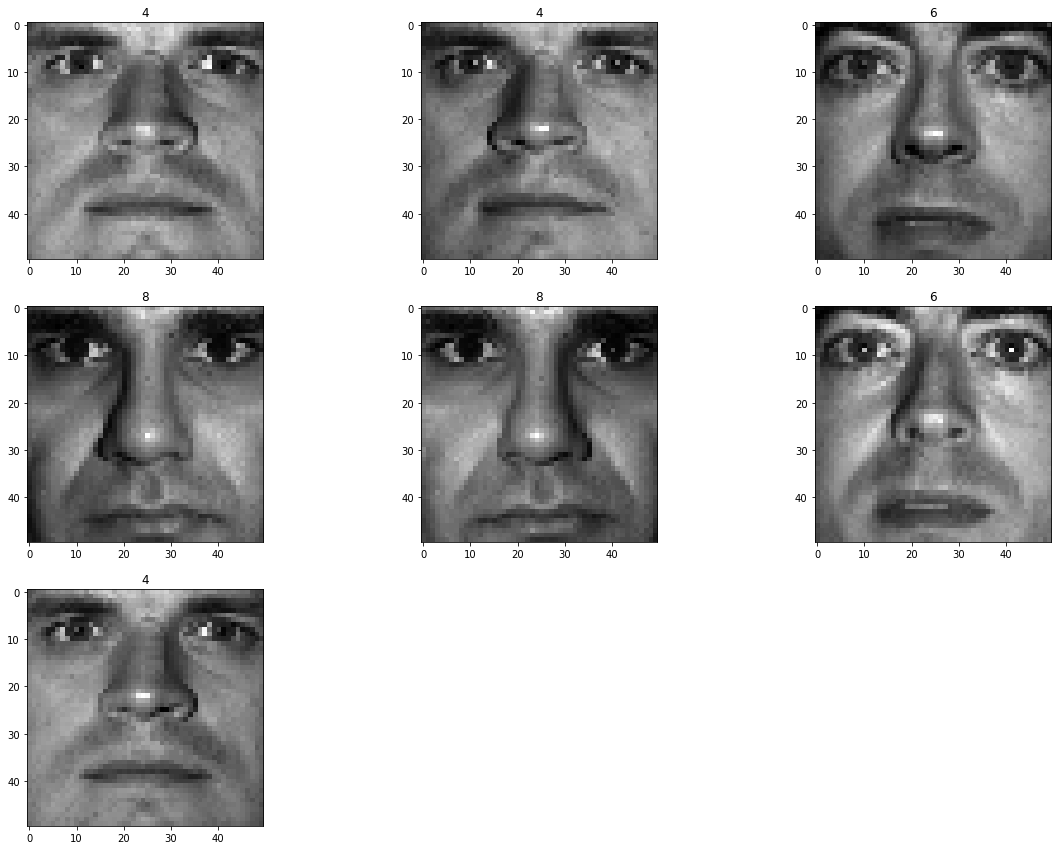

In [6]:
idx = np.random.randint(10)
def visualize(T, train_labels):
    plt.figure(figsize=(20, 20))
    for i in range(7):
        plt.subplot(4,3,i+1)
        plt.imshow(T[:,i+7*idx].reshape(50, 50), cmap='gray')
        plt.title(str(train_labels[i+7*idx]))
    plt.show()
    
visualize(T, train_labels)

In [7]:
def get_twenty_singular_vec(T):
    U, S, V = np.linalg.svd(T, full_matrices=False)
    return U[:,:20]

first_twenty = get_twenty_singular_vec(T)

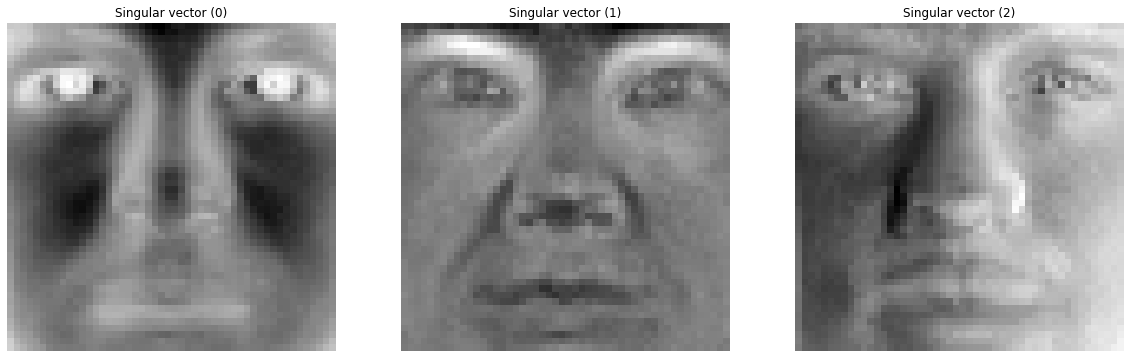

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(first_twenty[:,0].reshape(50, 50), cmap='gray')
plt.title('Singular vector (0)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(first_twenty[:,1].reshape(50, 50), cmap='gray')
plt.title('Singular vector (1)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(first_twenty[:,2].reshape(50, 50), cmap='gray')
plt.title('Singular vector (2)')
plt.axis('off')

plt.show()